In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# import cleaned data
df = pd.read_csv('./Data/cleaned_data.csv')
df.head()

,manufacturer,model,type,year,price,mileage,location,transmission,fuel_type,grade,car_condition
0,Mercedes-Benz,C300,Sedan,2015.0,10090000,93916.0,Lagos,automatic,Petrol,C,Nigerian used
1,Toyota,Tacoma,Pickup,2005.0,3930000,248415.0,Asaba,automatic,Petrol,D,Nigerian used
2,Toyota,Camry,Sedan,2003.0,1242000,180990.0,Lagos,automatic,Petrol,D,Nigerian used
3,Landrover,Range Rover Vogue,Suv,2010.0,5610000,119.0,Abuja,automatic,Petrol,C,Nigerian used
4,Mercedes-Benz,C250,Sedan,2012.0,5610000,234826.0,Kaduna,automatic,Petrol,C,Nigerian used


#### Exploring the target variable price

In [4]:
df.price.describe()

count    3.501000e+03
mean     3.728233e+06
std      4.692120e+06
min      3.575000e+05
25%      1.522000e+06
50%      2.474000e+06
75%      4.154000e+06
max      5.377000e+07
Name: price, dtype: float64

From the result above. The average price is (mean) higher than the median price which means most of the data points are to the left with outliers to the right. The data is right (postively) skewed. This means that most of the prices lie to the left and the outliers are amongst the higher priced cars

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


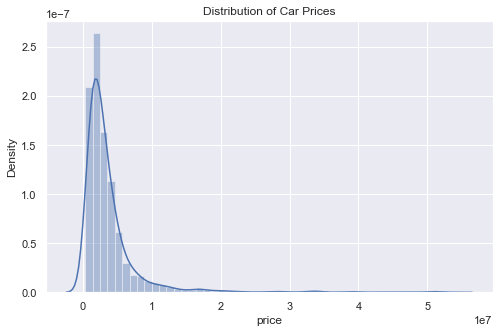

In [5]:
plt.figure(figsize=(8,5))
sns.distplot(df.price).set_title('Distribution of Car Prices')
plt.show()

<AxesSubplot:xlabel='price'>

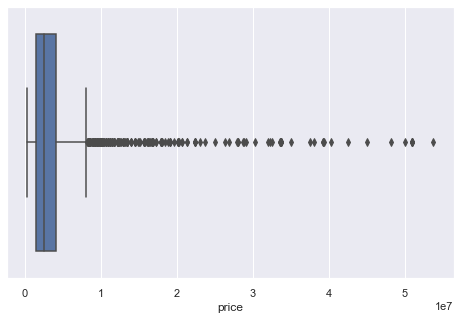

In [6]:
# Using boxplot to check for outliers in price
plt.figure(figsize=(8,5))
sns.boxplot(x =df['price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


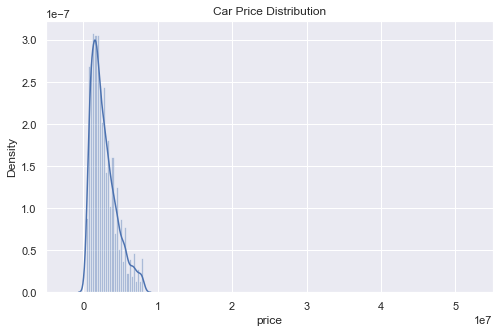

In [19]:
# checking the distribution of price with distplot
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(df.price, ax=ax).set_title('Car Price Distribution')
ax.set_xlim(-5000000,55000000)
plt.show()

In [15]:
df[df['price'] == df['price'].max()] 

,manufacturer,model,type,year,price,mileage,location,transmission,fuel_type,grade,car_condition
1782,Mercedes-Benz,GLC 300,Mpv,2020.0,53770000,4455.0,Lagos,automatic,Petrol,C,Foreign used


In [16]:
# removing outliers from the price column using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-2426000.0 8102000.0


In [17]:
outliers = df[(df.price < lower_bound) | (df.price > upper_bound)]
outliers

,manufacturer,model,type,year,price,mileage,location,transmission,fuel_type,grade,car_condition
0,Mercedes-Benz,C300,Sedan,2015.0,10090000,93916.0,Lagos,automatic,Petrol,C,Nigerian used
6,CHANGAN,CS35,Suv,2015.0,10090000,4065.0,Lagos,automatic,Petrol,C,Nigerian used
9,Toyota,Highlander,Suv,2014.0,17930000,73765.0,Lagos,automatic,Hybrid,C,Foreign used
12,GAC,GS8,Suv,2018.0,16810000,32156.0,Lagos,automatic,Petrol,D,Nigerian used
23,Toyota,Land Cruiser Prado,Suv,2009.0,9194000,126158.0,Lagos,automatic,Petrol,D,Nigerian used
...,...,...,...,...,...,...,...,...,...,...,...
3465,Jeep,Compass,Suv,2019.0,25000000,68.0,Lagos,automatic,Petrol,A,New
3466,Jeep,Grand Cherokee Premium Brand,Suv,2019.0,38090000,66.0,Lagos,automatic,Petrol,A,New
3467,Jeep,Grand Cherokee Luxury brand,Suv,2019.0,39210000,83.0,Lagos,automatic,Petrol,A,New
3468,Jeep,Grand Cherokee SRT,Suv,2019.0,50000000,83.0,Lagos,automatic,Petrol,A,New


In [18]:
# dropping outliers from dataset
df.drop(outliers.index, inplace=True)

<AxesSubplot:xlabel='price'>

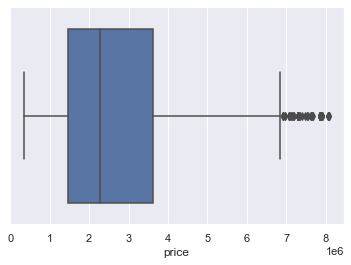

In [20]:
sns.boxplot(x=df['price'])

In [23]:
df['price'].describe()

count    3.243000e+03
mean     2.741483e+06
std      1.683775e+06
min      3.575000e+05
25%      1.466000e+06
50%      2.270000e+06
75%      3.620000e+06
max      8.074000e+06
Name: price, dtype: float64

Since we are working with used cars, I will dropping new cars from the dataset

In [24]:
# dropping new cars
new_cars = df[df['car_condition'] == 'New']
df.drop(new_cars.index, inplace=True)

In [25]:
df

,manufacturer,model,type,year,price,mileage,location,transmission,fuel_type,grade,car_condition
1,Toyota,Tacoma,Pickup,2005.0,3930000,248415.0,Asaba,automatic,Petrol,D,Nigerian used
2,Toyota,Camry,Sedan,2003.0,1242000,180990.0,Lagos,automatic,Petrol,D,Nigerian used
3,Landrover,Range Rover Vogue,Suv,2010.0,5610000,119.0,Abuja,automatic,Petrol,C,Nigerian used
4,Mercedes-Benz,C250,Sedan,2012.0,5610000,234826.0,Kaduna,automatic,Petrol,C,Nigerian used
5,Toyota,Tundra,Truck,2007.0,5066800,172632.0,Lagos,automatic,Petrol,D,Nigerian used
...,...,...,...,...,...,...,...,...,...,...,...
3495,Ford,Edge,Suv,2010.0,2770000,86999.0,Abuja,automatic,Petrol,C,Foreign used
3496,Honda,Accord Crosstour,Hatchback,2010.0,2885000,122048.0,Abuja,automatic,Petrol,D,Nigerian used
3497,Mercedes-Benz,Cls500,Coupe,2006.0,1390000,49844.0,PortHarcourt,automatic,Petrol,D,Nigerian used
3498,Infiniti,G,Sedan,2005.0,2080000,1249000.0,Owerri,automatic,Petrol,C,Foreign used


The type column will not have much use in the dataset as the model and year columns provide better descriptions of the car so I will drop it

In [26]:
del df['type']

In [27]:
df

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition
1,Toyota,Tacoma,2005.0,3930000,248415.0,Asaba,automatic,Petrol,D,Nigerian used
2,Toyota,Camry,2003.0,1242000,180990.0,Lagos,automatic,Petrol,D,Nigerian used
3,Landrover,Range Rover Vogue,2010.0,5610000,119.0,Abuja,automatic,Petrol,C,Nigerian used
4,Mercedes-Benz,C250,2012.0,5610000,234826.0,Kaduna,automatic,Petrol,C,Nigerian used
5,Toyota,Tundra,2007.0,5066800,172632.0,Lagos,automatic,Petrol,D,Nigerian used
...,...,...,...,...,...,...,...,...,...,...
3495,Ford,Edge,2010.0,2770000,86999.0,Abuja,automatic,Petrol,C,Foreign used
3496,Honda,Accord Crosstour,2010.0,2885000,122048.0,Abuja,automatic,Petrol,D,Nigerian used
3497,Mercedes-Benz,Cls500,2006.0,1390000,49844.0,PortHarcourt,automatic,Petrol,D,Nigerian used
3498,Infiniti,G,2005.0,2080000,1249000.0,Owerri,automatic,Petrol,C,Foreign used


#### Checking the distribution of Mileage

In [29]:
df['mileage'].describe()

count    3.241000e+03
mean     1.567379e+05
std      1.205672e+05
min      1.000000e+00
25%      9.524300e+04
50%      1.392510e+05
75%      1.953220e+05
max      2.293968e+06
Name: mileage, dtype: float64

The datapoints in the mileage column reveal that the mileage data is positively skewed as the mean is higher than the median. This means that most of the dataponts lie to the left of the graph which means that most cars have a low mileage.

It also shows that some cars have a mileage value of 1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


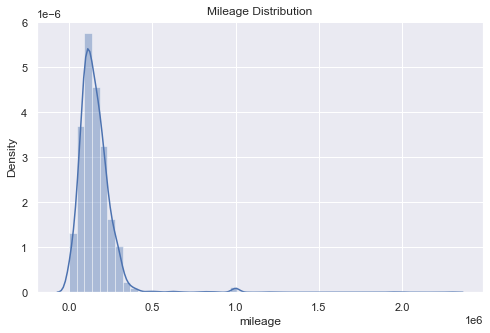

In [30]:
# checking the distribution of mileage with distplot
plt.figure(figsize=(8,5))
sns.distplot(df.mileage).set_title('Mileage Distribution')
plt.show()

In [34]:
# cars with a mileage of 1
df[df['mileage']==1]

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition
173,Toyota,Sienna,2006.0,1130000,1.0,Lagos,automatic,Petrol,D,Nigerian used
186,Mercedes-Benz,CLA,2016.0,7066000,1.0,Lagos,automatic,Petrol,E,Nigerian used
314,Cadillac,Cts,2008.0,2362000,1.0,Lagos,automatic,Petrol,D,Nigerian used
434,Renault,19,1995.0,1006800,1.0,Lagos,manual,Diesel,D,Nigerian used
677,Mercedes-Benz,GL450,2007.0,4490000,1.0,PortHarcourt,automatic,Petrol,D,Nigerian used
1006,Ford,Explorer,2005.0,1416250,1.0,Lagos,automatic,Petrol,C,Nigerian used
1348,Toyota,Land Cruiser Prado,2003.0,2250000,1.0,Lagos,manual,Petrol,C,Nigerian used
1589,Hyundai,Accent,2012.0,1130000,1.0,Lagos,automatic,Petrol,E,Nigerian used
1660,Honda,Civic,2008.0,1466000,1.0,Lagos,automatic,Petrol,C,Nigerian used
1759,Honda,Odyssey,2001.0,1018000,1.0,Lagos,automatic,Petrol,C,Nigerian used


It is not possible for used cars to have a mileage of 1 therefore we will remove cars which have a mileage of 1 from the dataset

In [35]:
mile1 = df[df['mileage']==1]
df.drop(mile1.index, inplace=True)

In [36]:
df

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition
1,Toyota,Tacoma,2005.0,3930000,248415.0,Asaba,automatic,Petrol,D,Nigerian used
2,Toyota,Camry,2003.0,1242000,180990.0,Lagos,automatic,Petrol,D,Nigerian used
3,Landrover,Range Rover Vogue,2010.0,5610000,119.0,Abuja,automatic,Petrol,C,Nigerian used
4,Mercedes-Benz,C250,2012.0,5610000,234826.0,Kaduna,automatic,Petrol,C,Nigerian used
5,Toyota,Tundra,2007.0,5066800,172632.0,Lagos,automatic,Petrol,D,Nigerian used
...,...,...,...,...,...,...,...,...,...,...
3495,Ford,Edge,2010.0,2770000,86999.0,Abuja,automatic,Petrol,C,Foreign used
3496,Honda,Accord Crosstour,2010.0,2885000,122048.0,Abuja,automatic,Petrol,D,Nigerian used
3497,Mercedes-Benz,Cls500,2006.0,1390000,49844.0,PortHarcourt,automatic,Petrol,D,Nigerian used
3498,Infiniti,G,2005.0,2080000,1249000.0,Owerri,automatic,Petrol,C,Foreign used


In [39]:
# Checking for duplicated rows and dropping them
df[df.duplicated()]

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition
2961,Lexus,Es 350,2008.0,2607500,109160.0,Onitsha,automatic,Petrol,E,Nigerian used


In [41]:
df.drop(2961,axis='index',inplace=True)

In [55]:
df[df['mileage']<1000]

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition
3,Landrover,Range Rover Vogue,2010.0,5610000,119.0,Abuja,automatic,Petrol,C,Nigerian used
464,Kia,Rio,2020.0,6730000,183.0,Lagos,automatic,Petrol,A,Nigerian used
492,Mercedes-Benz,E500,2005.0,1354000,138.0,Lagos,automatic,Petrol,E,Foreign used
525,BMW,5 Series,2006.0,1802000,111.0,Lagos,automatic,Petrol,E,Nigerian used
1071,Mercedes-Benz,S550,2007.0,5050000,134.0,Lagos,automatic,Petrol,C,Nigerian used
1992,Nissan,Altima,2015.0,4378000,731.0,Abuja,automatic,Petrol,C,Nigerian used
2108,Mercedes-Benz,C280,2007.0,1690000,65.0,Abuja,automatic,Petrol,E,Nigerian used
2120,Mercedes-Benz,S550,2007.0,3930000,76.0,Lagos,automatic,Petrol,D,Nigerian used
2286,Lexus,Rx 300,2000.0,1690000,164.0,Abuja,automatic,Petrol,D,Nigerian used
3114,Acura,Rdx,2008.0,2810000,109.0,Lagos,automatic,Petrol,C,Foreign used


used cars which are more than a year old cannot have a mileage less than 1000km therefore we will drop such cars from the dataset

In [56]:
mile_less_than_1000 = df[df['mileage']<1000]

df.drop(mile_less_than_1000.index,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


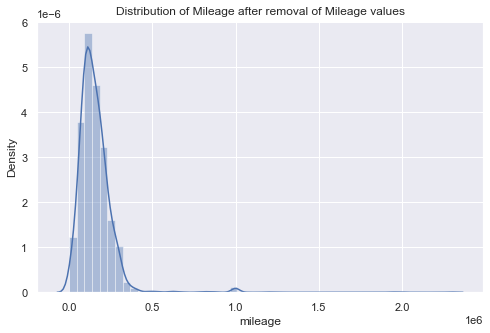

In [59]:
# checking the distribution of mileage with distplot
plt.figure(figsize=(8,5))
sns.distplot(df.mileage).set_title('Distribution of Mileage after removal of Mileage values')
plt.show()

The data is still postively skewed, will proceed to check for outliers

<AxesSubplot:xlabel='mileage'>

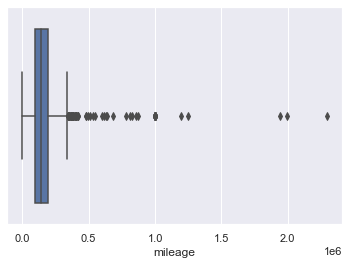

In [60]:
# Checking for outliers using boxplot
sns.boxplot(x=df['mileage'])

In [61]:
# removing outliers from the mileage column using IQR
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-52587.75 344864.25


In [62]:
outliers = df[(df.mileage < lower_bound) | (df.mileage > upper_bound)]
outliers

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition
126,Toyota,Camry,2007.0,2250000,350180.0,Lagos,automatic,Petrol,E,Nigerian used
177,Mercedes Benz,E320,2001.0,962000,398763.0,Lagos,automatic,Petrol,D,Nigerian used
204,Peugeot,406,2008.0,1242000,999999.0,Lagos,manual,Petrol,E,Nigerian used
205,Toyota,Corolla,2007.0,1074000,479005.0,Abuja,automatic,Petrol,D,Nigerian used
258,Toyota,Camry,1997.0,738000,378131.0,Onitsha,automatic,Petrol,D,Nigerian used
...,...,...,...,...,...,...,...,...,...,...
3198,Volvo,S60,2002.0,863750,999999.0,Abuja,automatic,Petrol,C,Nigerian used
3435,Mercedes-Benz,Gl450,2007.0,5760000,531598.0,Abuja,automatic,Petrol,C,Foreign used
3446,Honda,Accord Crosstour,2010.0,4035000,423378.0,Onitsha,automatic,Petrol,C,Foreign used
3488,Peugeot,607,2002.0,930000,350999.0,Abuja,manual,Petrol,C,Nigerian used


In [63]:
df.drop(outliers.index,inplace=True)

In [64]:
df

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition
1,Toyota,Tacoma,2005.0,3930000,248415.0,Asaba,automatic,Petrol,D,Nigerian used
2,Toyota,Camry,2003.0,1242000,180990.0,Lagos,automatic,Petrol,D,Nigerian used
4,Mercedes-Benz,C250,2012.0,5610000,234826.0,Kaduna,automatic,Petrol,C,Nigerian used
5,Toyota,Tundra,2007.0,5066800,172632.0,Lagos,automatic,Petrol,D,Nigerian used
7,Honda,Jazz,2008.0,1130000,155077.0,Lagos,manual,Petrol,D,Nigerian used
...,...,...,...,...,...,...,...,...,...,...
3493,Landrover,Range Rover Sport,2008.0,3460000,46683.0,PortHarcourt,automatic,Petrol,D,Nigerian used
3495,Ford,Edge,2010.0,2770000,86999.0,Abuja,automatic,Petrol,C,Foreign used
3496,Honda,Accord Crosstour,2010.0,2885000,122048.0,Abuja,automatic,Petrol,D,Nigerian used
3497,Mercedes-Benz,Cls500,2006.0,1390000,49844.0,PortHarcourt,automatic,Petrol,D,Nigerian used


<AxesSubplot:xlabel='mileage'>

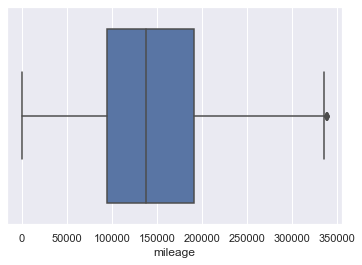

In [66]:
# boxplot after removing outliers in mileage column
sns.boxplot(x = df['mileage'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3146 entries, 1 to 3499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   3146 non-null   object 
 1   model          3146 non-null   object 
 2   year           3146 non-null   float64
 3   price          3146 non-null   int64  
 4   mileage        3146 non-null   float64
 5   location       3146 non-null   object 
 6   transmission   3146 non-null   object 
 7   fuel_type      3146 non-null   object 
 8   grade          3146 non-null   object 
 9   car_condition  3146 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 270.4+ KB


In [69]:
# Converting the datatype of the year, price and mileage column to int
df.year = df.year.astype(int)
df.price = df.price.astype(int)
df.mileage = df.mileage.astype(int)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3146 entries, 1 to 3499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   manufacturer   3146 non-null   object
 1   model          3146 non-null   object
 2   year           3146 non-null   int32 
 3   price          3146 non-null   int32 
 4   mileage        3146 non-null   int32 
 5   location       3146 non-null   object
 6   transmission   3146 non-null   object
 7   fuel_type      3146 non-null   object
 8   grade          3146 non-null   object
 9   car_condition  3146 non-null   object
dtypes: int32(3), object(7)
memory usage: 233.5+ KB


## Data Analysis

#### Mileage vs Price

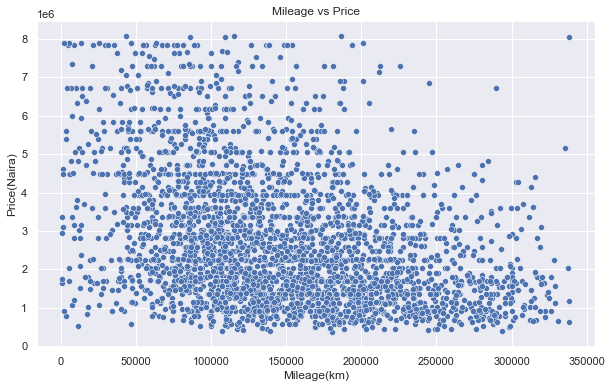

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Mileage vs Price')
# Set x-axis label
plt.xlabel('Mileage(km)')
# Set y-axis label
plt.ylabel('Price(Naira)')
plt.show()

The scatterplot shows that as the mileage of a car increases as the price of the car decreases

#### Year vs Price

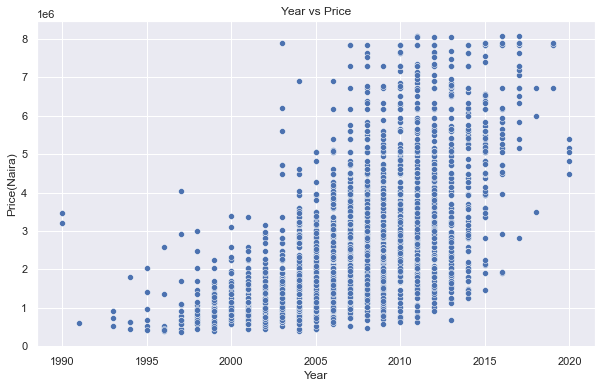

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Year vs Price')
# Set x-axis label
plt.xlabel('Year')
# Set y-axis label
plt.ylabel('Price(Naira)')
plt.show()

The scatterplot above shows that the prices of cars have increased each year with a quick rise between 2015 and 2020

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


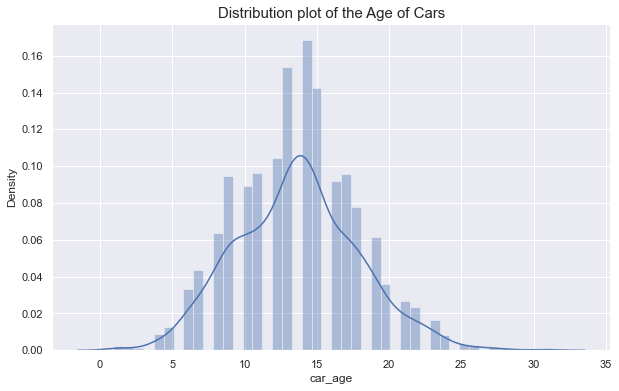

In [74]:
# creating a new column 'car_age' to check the distribution of cars in the country according to the age
import datetime
current_time = datetime.datetime.now()
df['car_age'] = current_time.year - df['year']

# checking the distribution of car age with distplot
plt.figure(figsize=(10,6))
sns.distplot(df.car_age).set_title('Distribution plot of the Age of Cars', fontsize=15)
plt.show()

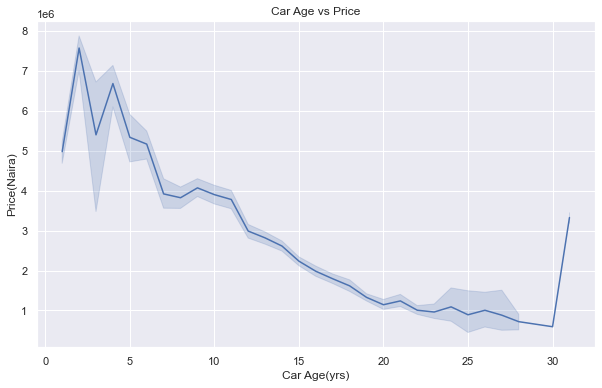

In [75]:
# plot to see the distribution of car age with price
plt.figure(figsize=(10,6))
sns.lineplot(x='car_age', y='price', data=df)
plt.title('Car Age vs Price')
# Set x-axis label
plt.xlabel('Car Age(yrs)')
# Set y-axis label
plt.ylabel('Price(Naira)')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


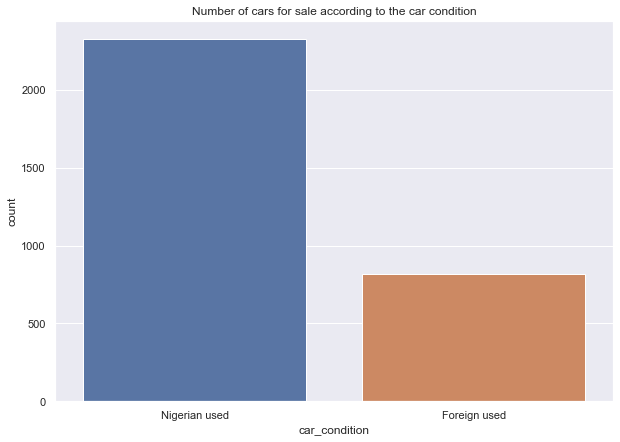

In [76]:
plt.figure(figsize=(10,7))
sns.countplot(df.car_condition).set_title('Number of cars for sale according to the car condition')
plt.show()

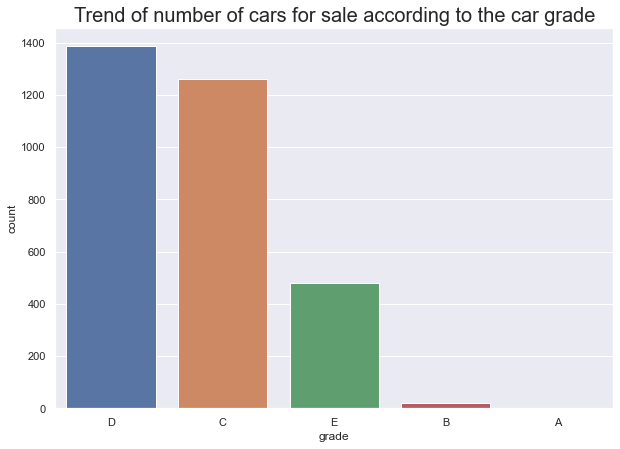

In [77]:
# checking the distribution of car grade
plt.figure(figsize=(10,7))
sns.countplot(x='grade', data=df).set_title('Trend of number of cars for sale according to the car grade', fontsize=20)
plt.show()

In [78]:
df[df['grade']=='A']

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition,car_age
762,Kia,Rio,2020,4490000,5800,Lagos,automatic,Petrol,A,Nigerian used,1
2022,Kia,Cerato,2019,7850000,8645,Lagos,automatic,Petrol,A,Nigerian used,2


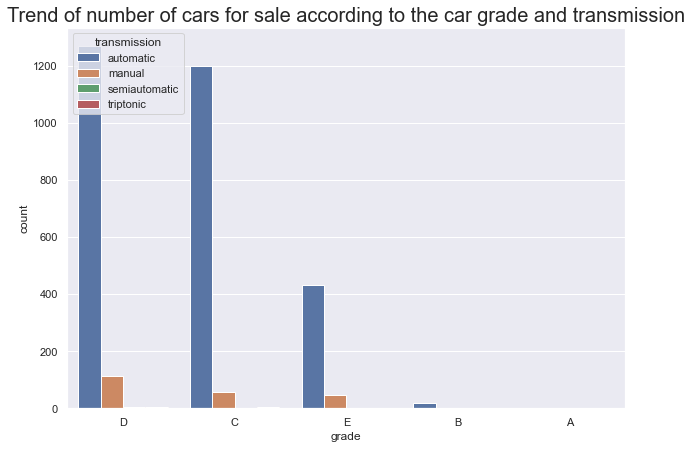

In [79]:
# checking the distribution of car grade and transmission
plt.figure(figsize=(10,7))
sns.countplot(x='grade', hue='transmission', data=df).set_title('Trend of number of cars for sale according to the car grade and transmission', fontsize=20)
plt.show()

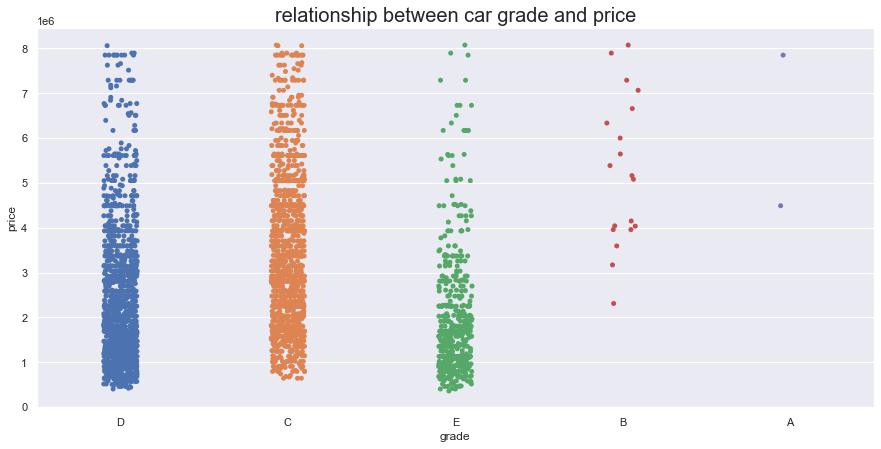

In [81]:
# plot to show relationship between car grade and price
plt.figure(figsize=(15,7))
sns.stripplot(y='price', x='grade', data=df).set_title('relationship between car grade and price', fontsize=20)
plt.show()

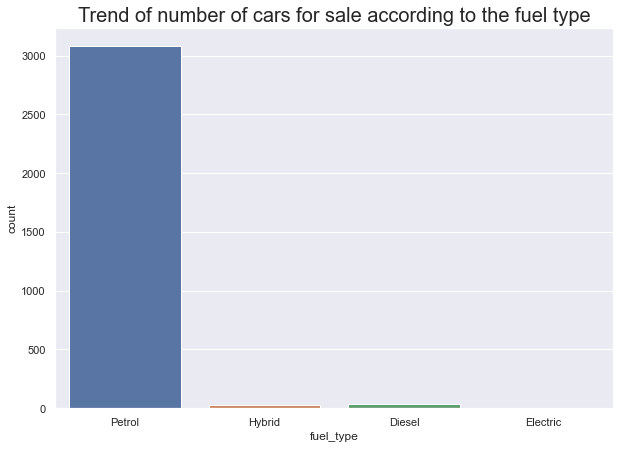

In [84]:
# checking the distribution of fuel 
plt.figure(figsize=(10,7))
sns.countplot(x='fuel_type', data=df).set_title('Trend of number of cars for sale according to the fuel type', fontsize=20)
plt.show()

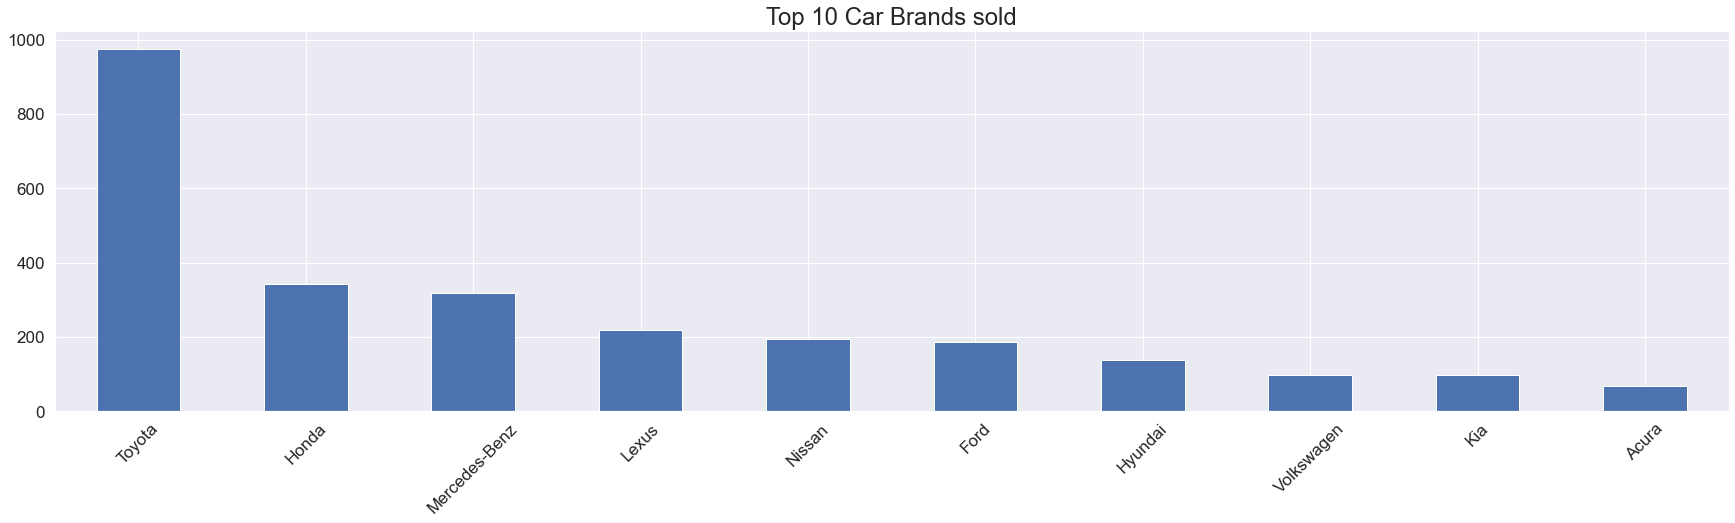

In [89]:
# plot to show the top 10 car brands 
plt.figure(figsize=(30,7))
df['manufacturer'].value_counts()[:10].plot(kind='bar', fontsize=17, rot=45)
plt.title('Top 10 Car Brands sold', fontsize=24)
plt.show()

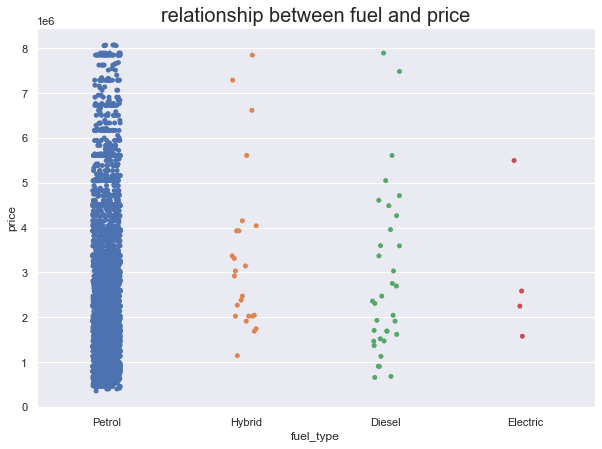

In [91]:
# plot to show relationship between fuel type and price
plt.figure(figsize=(10,7))
sns.stripplot(y='price', x='fuel_type', data=df).set_title('relationship between fuel and price', fontsize=20)
plt.show()

In [92]:
cheap_cars = df.groupby(['manufacturer'])['price'].mean().sort_values(ascending=True).head(10)
expensive_cars = df.groupby(['manufacturer'])['price'].mean().sort_values(ascending=False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


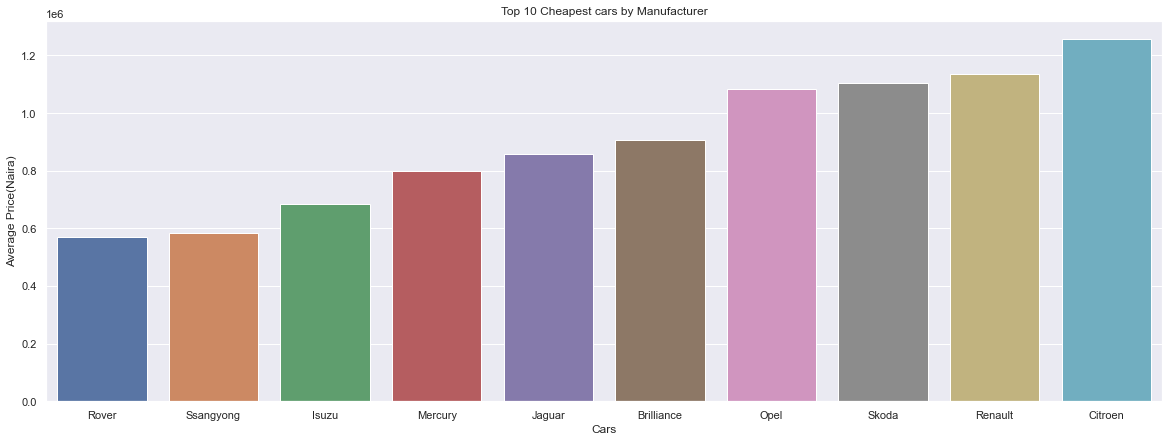

In [93]:
# plot to show top 10 cheapest cars
plt.figure(figsize=(20,7))
sns.barplot(cheap_cars.index, cheap_cars.values)
plt.title('Top 10 Cheapest cars by Manufacturer')
plt.ylabel('Average Price(Naira)', fontsize=12)
plt.xlabel('Cars', fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


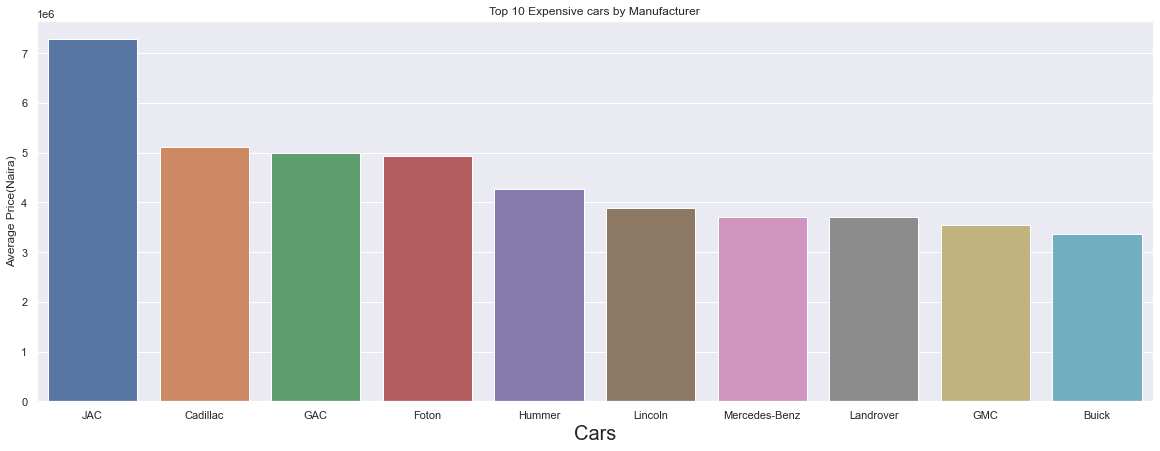

In [178]:
# plot to show top 10 expensive cars
plt.figure(figsize=(20,7))
sns.barplot(expensive_cars.index, expensive_cars.values)
plt.title('Top 10 Expensive cars by Manufacturer')
plt.ylabel('Average Price(Naira)', fontsize=12)
plt.xlabel('Cars', fontsize=20)
plt.show()

In [179]:
# plot showing top 10 car models sold by their manufacturer
gr = df.groupby(['model','manufacturer'])['model'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(20,7))
sns.barplot(gr.index.get_level_values(0), gr.values, hue=gr.index.get_level_values(1))
plt.title('Top 10 car models sold by Manufacturer and Model')
plt.ylabel('No of cars for sale', fontsize=12)
plt.xlabel('Car model', fontsize=20
plt.show()

SyntaxError: invalid syntax (<ipython-input-179-dd393da1112a>, line 8)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


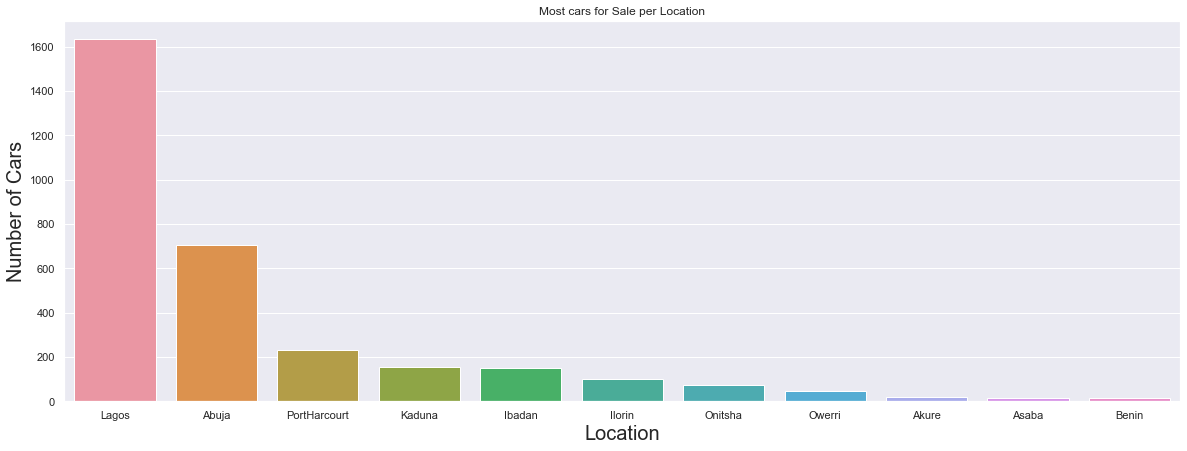

In [182]:
# plot showing most cars per location

location = df.groupby(['location'])['location'].count().sort_values(ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(location.index, location.values)
plt.title('Most cars for Sale per Location')
plt.ylabel('Number of Cars', fontsize=20)
plt.xlabel('Location', fontsize=20)
plt.show()

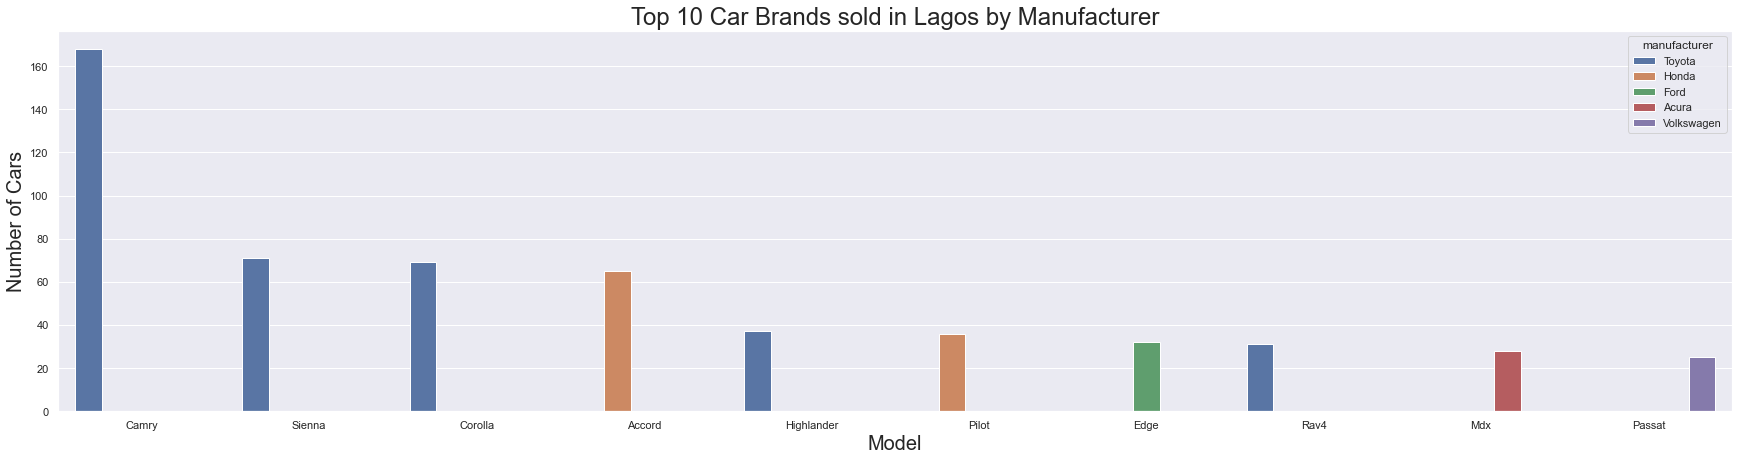

In [184]:
# The top 10 cars sold in Lagos
df_lagos = df[(df['location']=='Lagos')]
gr = df_lagos.groupby(['manufacturer','model'])['manufacturer'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(30,7))
sns.barplot(x=gr.index.get_level_values(1),y=gr.values,hue=gr.index.get_level_values(0))
plt.title('Top 10 Car Brands sold in Lagos by Manufacturer', fontsize=24)
plt.ylabel('Number of Cars', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.show()

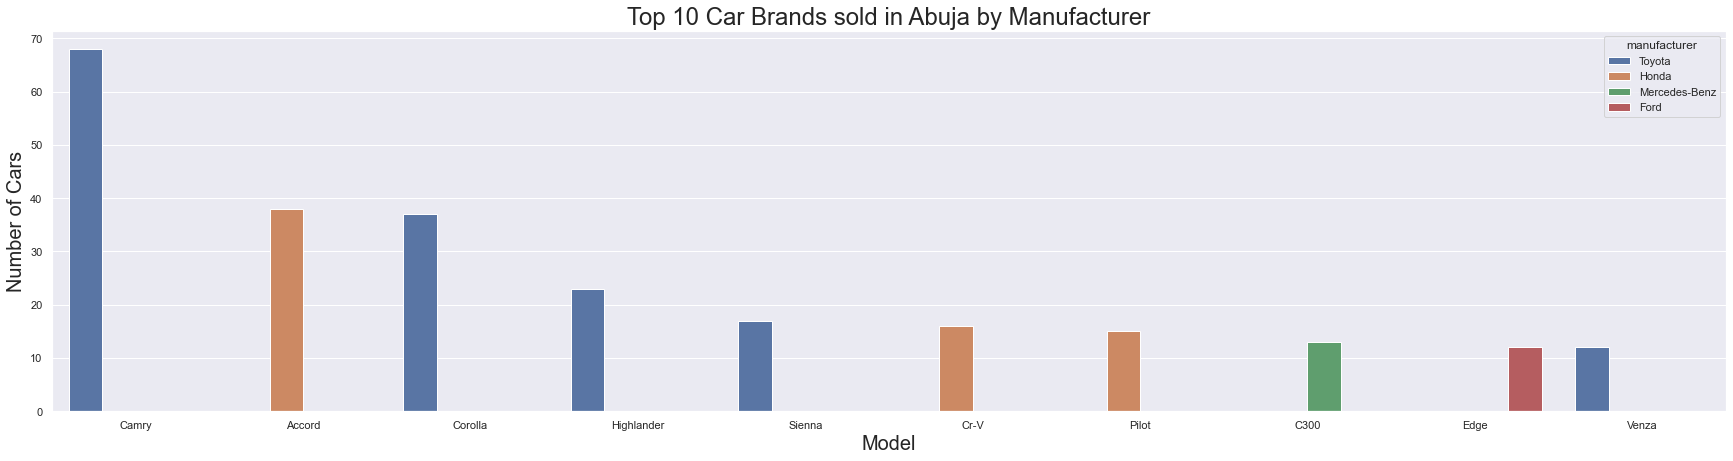

In [185]:
# The top 10 cars sold in Abuja
df_lagos = df[(df['location']=='Abuja')]
gr = df_lagos.groupby(['manufacturer','model'])['manufacturer'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(30,7))
sns.barplot(x=gr.index.get_level_values(1),y=gr.values,hue=gr.index.get_level_values(0))
plt.title('Top 10 Car Brands sold in Abuja by Manufacturer', fontsize=24)
plt.ylabel('Number of Cars', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.show()

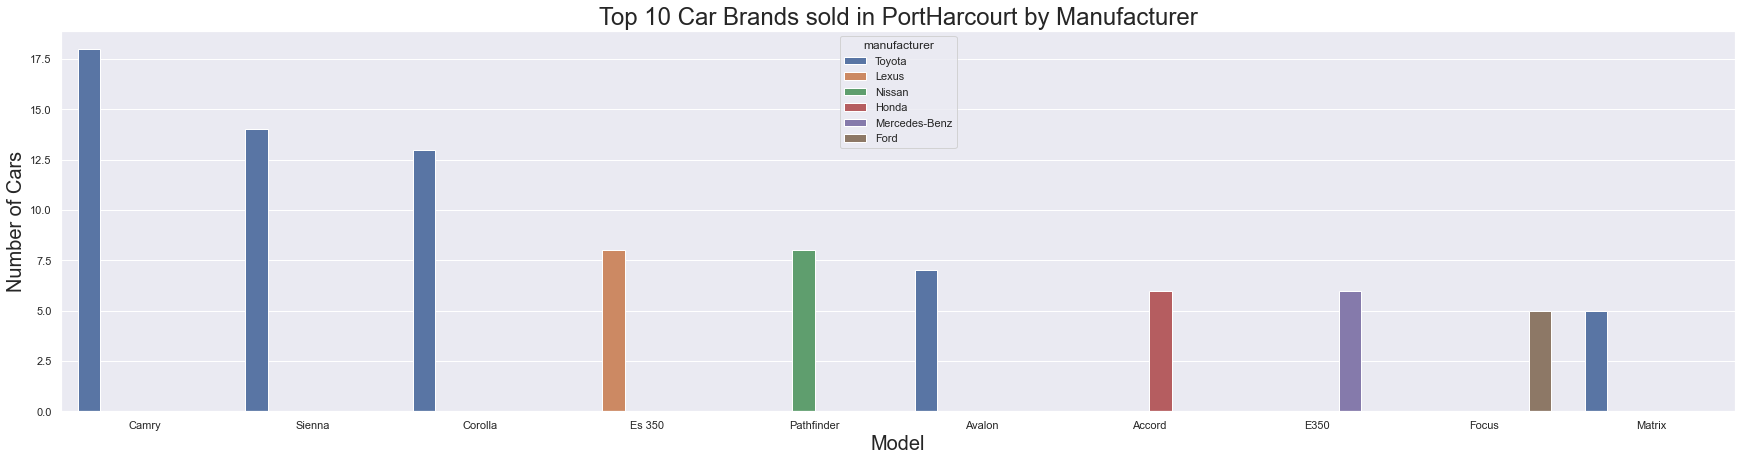

In [186]:
# The top 10 cars sold in Lagos
df_lagos = df[(df['location']=='PortHarcourt')]
gr = df_lagos.groupby(['manufacturer','model'])['manufacturer'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(30,7))
sns.barplot(x=gr.index.get_level_values(1),y=gr.values,hue=gr.index.get_level_values(0))
plt.title('Top 10 Car Brands sold in PortHarcourt by Manufacturer', fontsize=24)
plt.ylabel('Number of Cars', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.show()

In [177]:
# save 
df.to_csv('./Data/EDA_of_used_cars.csv', index=False)